In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load and preprocess the dataset
dataset = pd.read_csv("general.csv")
X = dataset.drop('Disease', axis=1)
y = dataset['Disease']

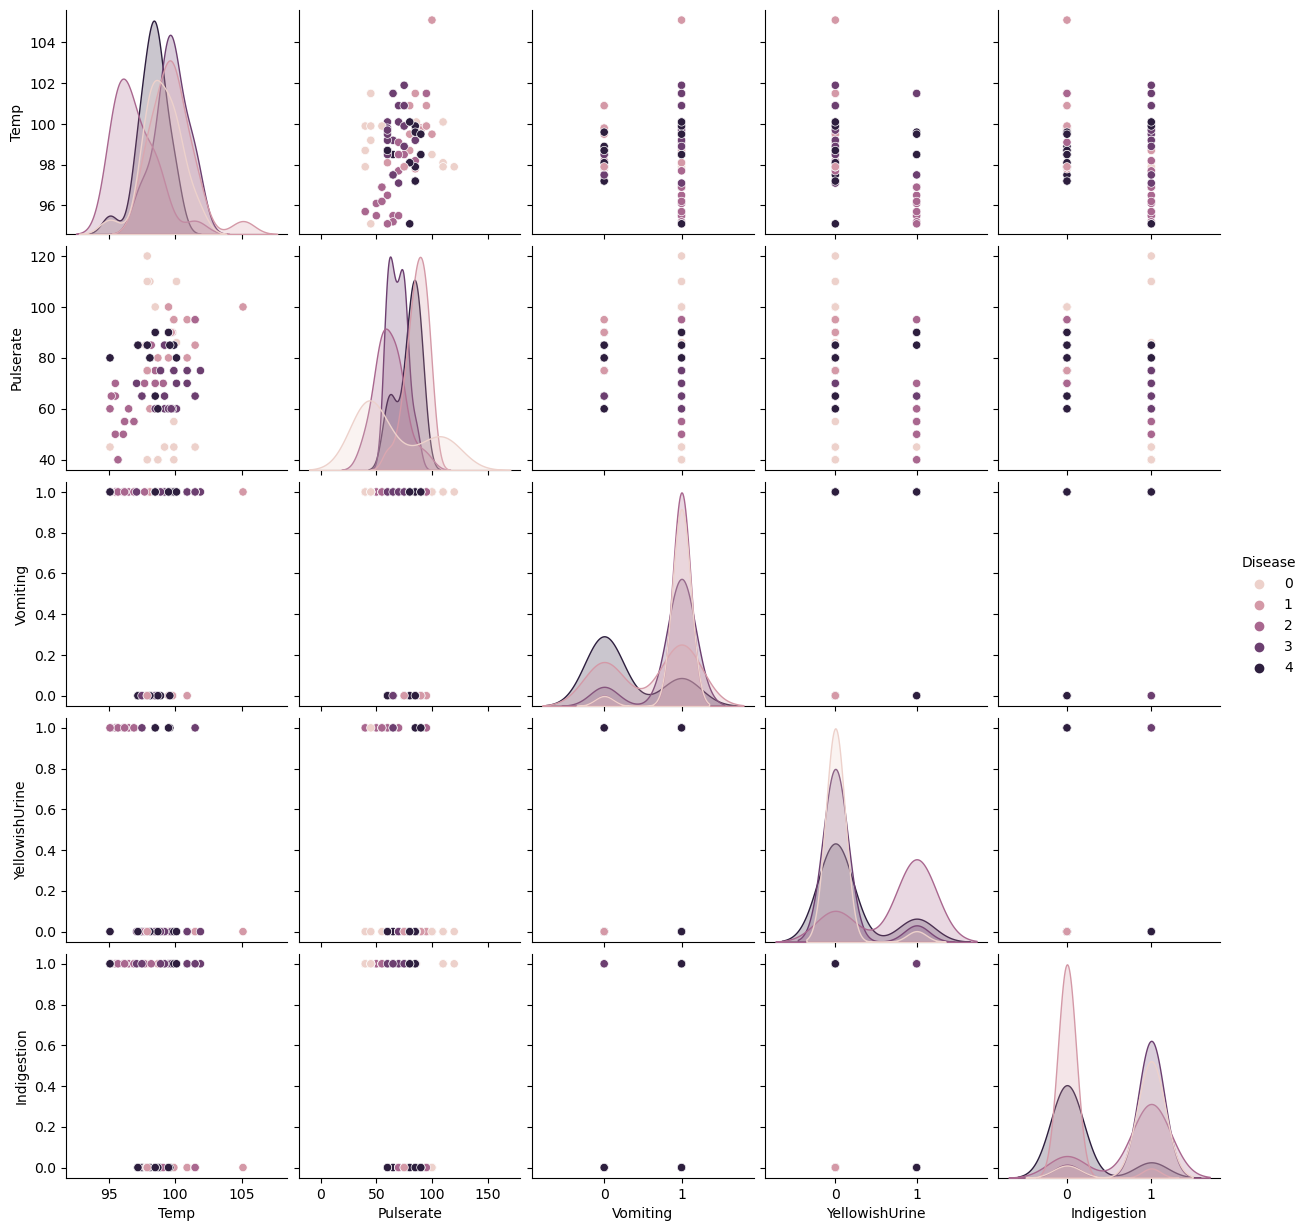

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(dataset, hue='Disease')
plt.show()

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
# Function to get user input and predict the disease
def predict_disease():
    print("Enter the following information:")
    temp_f = float(input("Temperature (F): "))
    pulse_rate_bpm = float(input("Pulse rate (bpm): "))
    vomiting = int(input("Vomiting (0 or 1): "))
    yellowish_urine = int(input("Yellowish Urine (0 or 1): "))
    indigestion = int(input("Indigestion (0 or 1): "))

    # Prepare user input as a single-row DataFrame
    user_input = pd.DataFrame({
        'Temp': [temp_f],
        'Pulserate': [pulse_rate_bpm],
        'Vomiting': [vomiting],
        'YellowishUrine': [yellowish_urine],
        'Indigestion': [indigestion]
    })

    # Standardize the user input
    user_input = scaler.transform(user_input)

    # Make prediction
    predicted_disease = model.predict(user_input)[0]
    print(f"Predicted Disease: {predicted_disease}")

# Call the predict_disease function to allow the user to input attributes and get predictions
predict_disease()


In [ ]:
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y, y_pred))
